In [88]:
import numpy as np
import sys,os
sys.path.append(os.getcwd()[:-11]+'src/')
from models import *
from topological_methods import *
import matplotlib.pyplot as plt
from persim import wasserstein
clrs = plt.cm.tab20.colors

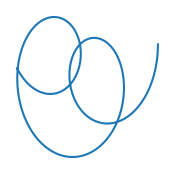

In [273]:
#Test random knots
n_samples = 500
n_knots = 1
Mfld = ManifoldGenerator()
Phom = PersistentHomology()
rand_params = 2*(np.random.rand(n_knots,4)-0.5)
random_knots = [Mfld.ParametricKnot(n_samples, params[0], 
                                    params[1], params[0], 
                                    params[1], [1]) for params in rand_params]

plt.figure(figsize=(2*n_knots,2))
for i in range(n_knots):
    plt.subplot(1,n_knots,i+1)
    plt.plot(random_knots[i][0], random_knots[i][1])
    plt.axis('off')

In [431]:
x = torch.Tensor(random_knots[0]).T
model = FeedforwardNetwork(input_size=2,hidden_sizes=[5]*3, out_layer_sz = 2, init_type='none')
model_out = model(x)[-1].detach().numpy()
out_code = model.compute_codeword_eq_classes(x)
model_ranks = model.compute_rank_classes(x)
rank_eq_class = []
for points in out_code[0][-1]:
    if len(points)>1 and np.any(model_ranks[1][-1][points]<2):
        rank_eq_class.append(points)
hom_group = Phom.normalize(Phom.homology_analysis(x,pairwise_distances,False,[1,None])[1])
quot_dist, quot_hom, _ = Phom.relative_homology(x,rank_eq_class,pairwise_distances,False,[1,None])
hom_group_rank = Phom.normalize(quot_hom)
wasserstein_distance = wasserstein(hom_group[1],hom_group_rank[1],matching=True)

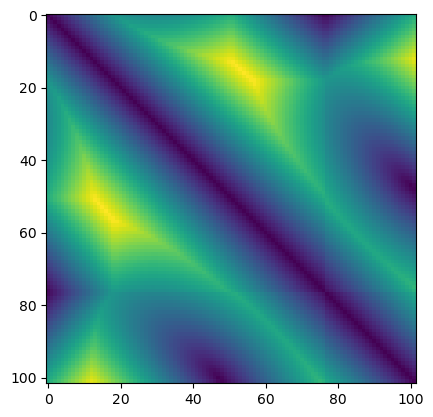

In [432]:
plt.imshow(quot_dist)

In [433]:
from sklearn.manifold import MDS
reducer = MDS(n_components=2, normalized_stress='auto',dissimilarity='precomputed')
knot_quot = reducer.fit_transform(quot_dist)

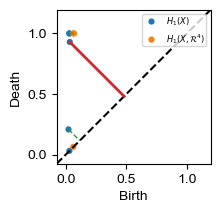

In [493]:
from persim import bottleneck_matching
import matplotlib as mpl
mpl.rc('font',family='Arial')
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(2,2))
bottleneck_matching(hom_group[1],hom_group_rank[1],wasserstein_distance[1],labels=['$H_1(X)$', '$H_1(X,\mathcal{R}^4)$'])
plt.legend(borderpad=0.1,  prop={'size': 6},loc=1)
plt.savefig('/Users/kosio/Figures/MfldClassification/Wasserstein_matching.png',dpi=500,transparent=True,bbox_inches='tight')

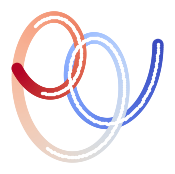

In [499]:
plt.figure(figsize=(2*n_knots,2))
for i in range(n_knots):
    plt.subplot(1,n_knots,i+1)
    plt.scatter(random_knots[i][0], random_knots[i][1],c=np.arange(0,len(random_knots[i].T)),s=50,cmap='coolwarm')
    plt.scatter(random_knots[i][0,rank_eq_class[0]], random_knots[i][1,rank_eq_class[0]],c='white',s=2)
    plt.axis('off')
plt.savefig('/Users/kosio/Figures/MfldClassification/original_mfld.png',dpi=500,transparent=True,bbox_inches='tight')

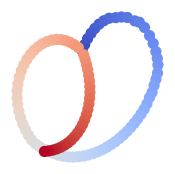

In [500]:
plt.figure(figsize=(2*n_knots,2))
for i in range(n_knots):
    plt.subplot(1,n_knots,i+1)
    plt.scatter(knot_quot[:,0], knot_quot[:,1],c=np.arange(0,len(knot_quot)),s=50,cmap='coolwarm')
    plt.axis('off')
plt.savefig('/Users/kosio/Figures/MfldClassification/quot_mfld.png',dpi=500,transparent=True,bbox_inches='tight')

In [507]:
#Plots for normal initialization
n_perms = 100
out_dims = [2,5,10,25,50,100]

hom_groups = np.empty(shape=[len(out_dims),n_perms],dtype=np.object_)
hom_groups_rank = np.empty(shape=[len(out_dims),n_perms],dtype=np.object_)
hom_distances = np.zeros([len(out_dims),n_perms])

for n, dim_out in enumerate(out_dims):
    for l in range(n_perms):
        rand_params = 2*(np.random.rand(1,4)-0.5)
        x = torch.Tensor([Mfld.ParametricKnot(n_samples, params[0], 
                        params[1], params[0], 
                        params[1], [1]) for params in rand_params])[0].T
        rand_model = FeedforwardNetwork(input_size=2,hidden_sizes=[dim_out]*3, out_layer_sz = 2, init_type='none')
        out = rand_model(x)[0]
        out_code = rand_model.compute_codeword_eq_classes(x)
        model_ranks = rand_model.compute_rank_classes(x)
        rank_eq_class = []
        for points in out_code[0][-1]:
            if len(points)>1 and np.any(model_ranks[1][-1][points]<2):
                rank_eq_class.append(points)
        hom_groups[n,l] = Phom.normalize(Phom.homology_analysis(x,pairwise_distances,False,[1,None])[1])
        try:
            hom_groups_rank[n,l] = Phom.normalize(Phom.relative_homology(x,rank_eq_class,pairwise_distances,False,[1,None])[1])
        except:
            hom_groups_rank[n,l] = hom_groups[n,l]
        hom_distances[n,l] = wasserstein(hom_groups[n,l][1],hom_groups_rank[n,l][1])

/Users/kosio/Repos/top-mfld-class/src/topological_methods.py:523: RuntimeWarning: invalid value encountered in divide
  norm_pers.append((birth_death_diagram[i]) / ax_max)
/Users/kosio/Repos/top-mfld-class/src/topological_methods.py:523: RuntimeWarning: invalid value encountered in divide
  norm_pers.append((birth_death_diagram[i]) / ax_max)
/Users/kosio/Repos/top-mfld-class/src/topological_methods.py:523: RuntimeWarning: invalid value encountered in divide
  norm_pers.append((birth_death_diagram[i]) / ax_max)
/Users/kosio/Repos/top-mfld-class/src/topological_methods.py:523: RuntimeWarning: invalid value encountered in divide
  norm_pers.append((birth_death_diagram[i]) / ax_max)
/Users/kosio/Repos/top-mfld-class/src/topological_methods.py:523: RuntimeWarning: invalid value encountered in divide
  norm_pers.append((birth_death_diagram[i]) / ax_max)
/Users/kosio/Repos/top-mfld-class/src/topological_methods.py:523: RuntimeWarning: invalid value encountered in divide
  norm_pers.append((bi

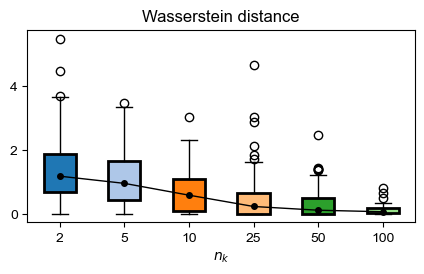

In [504]:
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(5,2.5))
boxplt = ax.boxplot(hom_distances.T,medianprops={'linewidth':0},patch_artist=True)

for n, patch in enumerate(boxplt['boxes']):
    patch.set_facecolor(clrs[n])
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
plt.plot(np.arange(1,7),np.median(hom_distances,1),'k-o',lw=1,markersize=4)
plt.xticks(np.arange(1,7),out_dims)
plt.xlabel('$n_k$')
plt.title('Wasserstein distance')
plt.savefig('/Users/kosio/Figures/MfldClassification/Wasserstein_distance.png',dpi=500,transparent=True,bbox_inches='tight')